<a href="https://colab.research.google.com/github/Temesgenasmamaw/Agriculture-Management-System/blob/main/v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,InputLayer
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [2]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import splitfolders
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:
#splitfolders.ratio('/content/drive/MyDrive/Mango/train', output="/content/drive/MyDrive/Dataset", seed=1000, ratio=(.8, 0.1,0.1)) 

In [6]:
train_datagen=ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.16,
    zoom_range=0.12,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255, 
    fill_mode='nearest',
)


train_gen=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
  
   
)

Found 881 images belonging to 3 classes.


In [7]:
class_names = list(train_gen.class_indices.keys())
class_names

['ANTH', 'Black', 'Healthy']

In [8]:
for image_batch,label_batch in train_gen:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [147]:
classes

['Anthracnos', 'Black_Soothy_Mold', 'Healthy ']

# Visualization

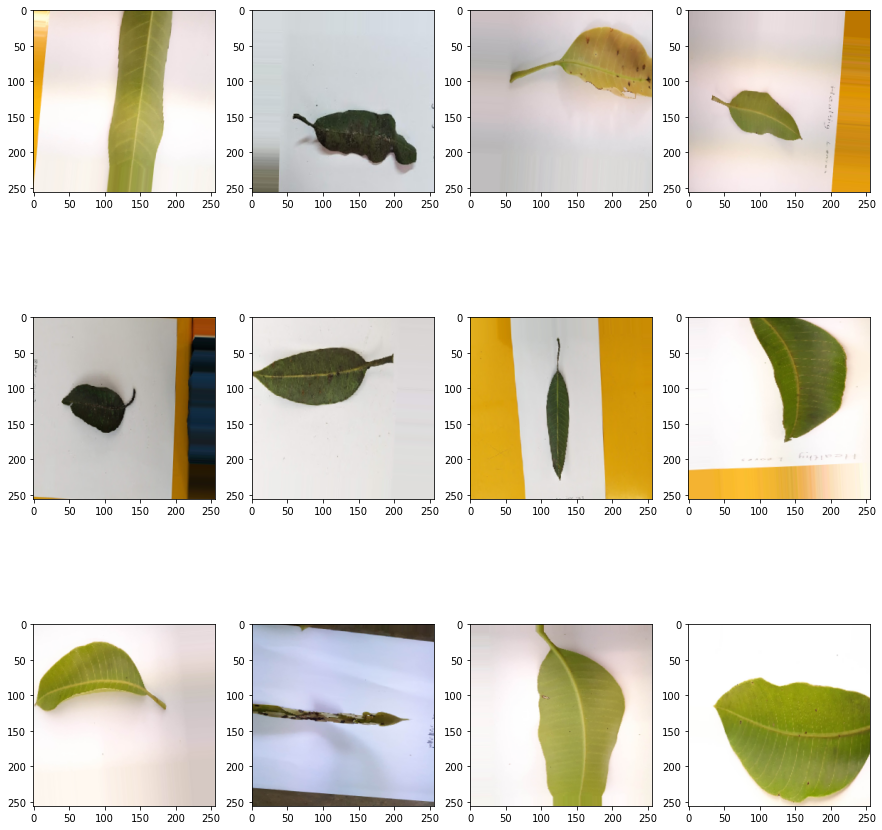

In [152]:
plt.figure(figsize=(15,16))
for image_batch,label_batch in train_gen:
  for i in range(12):
      plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i]) 
      #plt.title(classes[label_batch[0]])
  break

In [9]:
val_datagen=ImageDataGenerator(
      rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    vertical_flip=True,
     rescale=1./255,
      fill_mode='nearest',
)

val_gen=val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"

   
)

Found 109 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        )

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 113 images belonging to 3 classes.


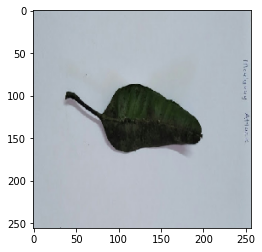

In [11]:
for image_batch, label_batch in test_generator:
    plt.imshow(image_batch[0])
    break

# Build CNN Model

In [16]:
IMG_SIZE=256
CHANNELS=3
n_classes = 3

input_shape = ( IMG_SIZE, IMG_SIZE, CHANNELS)

model=Sequential([
     
  layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(16, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.2),
    layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    Dropout(0.1),
    layers.Dense(3,activation='softmax')
])


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)      

# Compiling

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Training

In [19]:
history = model.fit(
    train_gen,
    steps_per_epoch=27,
    batch_size=32,
    validation_data=val_gen,
    validation_steps=3,
    verbose=1,
    epochs=50,
    callbacks=[
          # Stopping our training if val_accuracy doesn't improve after 20 epochs
          tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                           patience=25),
          # Saving the best weights of our model in the model directory
        
          # We don't want to save just the weight, but also the model architecture
          tf.keras.callbacks.ModelCheckpoint('model_.h5',
                                           save_best_only=True,
                                           save_weights_only=False,
                                           monitor='val_accuracy'
                                             )
    ]
)

Epoch 1/50
27/27 [==============================] - 832s 32s/step - loss: 1.0988 - accuracy: 0.3922 - val_loss: 1.0650 - val_accuracy: 0.3958
Epoch 2/50
27/27 [==============================] - 107s 4s/step - loss: 1.0497 - accuracy: 0.4759 - val_loss: 0.9629 - val_accuracy: 0.5729
Epoch 3/50
27/27 [==============================] - 100s 4s/step - loss: 0.8742 - accuracy: 0.5748 - val_loss: 0.8014 - val_accuracy: 0.5729
Epoch 4/50
27/27 [==============================] - 98s 4s/step - loss: 0.6543 - accuracy: 0.7197 - val_loss: 0.6030 - val_accuracy: 0.7396
Epoch 5/50
27/27 [==============================] - 99s 4s/step - loss: 0.4974 - accuracy: 0.7821 - val_loss: 0.4802 - val_accuracy: 0.7917
Epoch 6/50
27/27 [==============================] - 99s 4s/step - loss: 0.4378 - accuracy: 0.8198 - val_loss: 0.4281 - val_accuracy: 0.7708
Epoch 7/50
27/27 [==============================] - 98s 4s/step - loss: 0.3999 - accuracy: 0.8292 - val_loss: 0.4350 - val_accuracy: 0.8229
Epoch 8/50
27/27

In [20]:
model.evaluate(test_generator)

4/4 [==============================] - 96s 31s/step - loss: 0.0307 - accuracy: 0.9912


[0.030682995915412903, 0.991150438785553]

# Plotting the Accuracy and Loss Curves

In [21]:
model.save('cnn_98_99.h5')

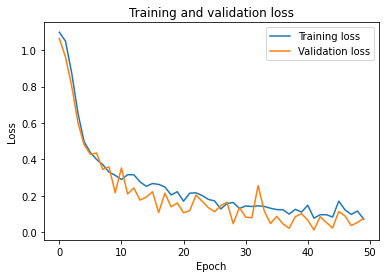

In [87]:
plt.plot(history.history["loss"], label='Training loss')
plt.plot(history.history["val_loss"], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


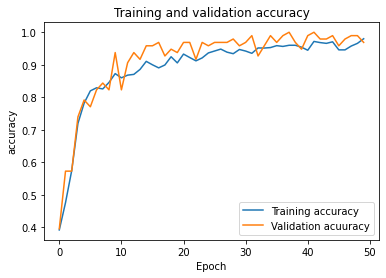

In [88]:

plt.plot(history.history["accuracy"], label='Training accuracy')
plt.plot(history.history["val_accuracy"], label='Validation acuuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# Run prediction on a sample image

**Write a function for inference**

In [89]:
def predict(model, img):
    img_array = img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**run inference on few sample images**



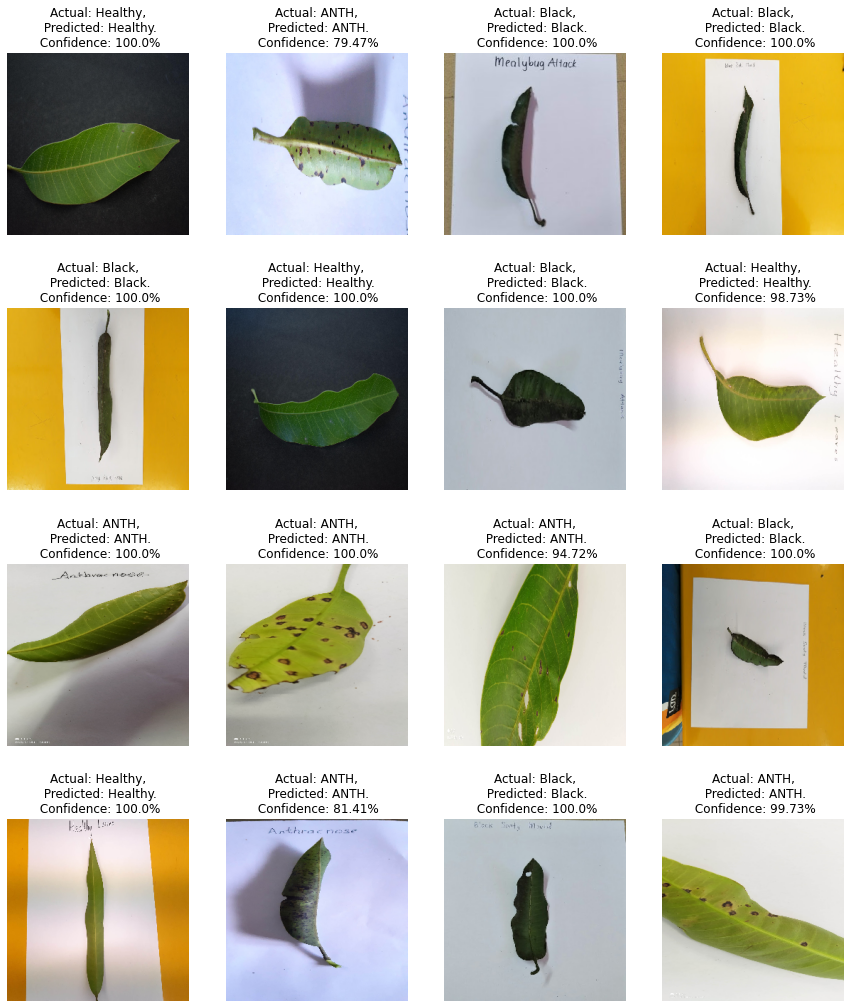

In [90]:
plt.figure(figsize=(15, 18))
for images, labels in test_generator:
    for i in range(16):
        ax = plt.subplot(4,4, i + 1)
        plt.imshow(images[i])
        
        predicted, confidence = predict(model, images[i])
        actual = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual},\n Predicted: {predicted}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

**Saving the Model**

In [91]:
from tensorflow import keras
models = keras.models.load_model('cnn_98_99.h5')

In [92]:
models.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)      

In [93]:
models.evaluate(test_generator)

4/4 [==============================] - 13s 2s/step - loss: 0.0307 - accuracy: 0.9912


[0.03068297728896141, 0.991150438785553]

In [96]:
classes=['Anthracnos','Black_Soothy_Mold','Healthy ']

In [121]:
 def testing(path):
    image=load_img(path,target_size=(256,256))
    image=img_to_array(image)/255
    inputs=np.expand_dims(image,axis=0)
    
    plt.imshow(inputs[0])
    
    pred=models.predict(inputs)
    pred=np.argmax(pred[0])
    prediction=classes[pred]
    confidence = round(100 * (np.max(inputs[0])), 2)
   
    
    if pred==0:
        print('\n\n')
        print("it is Anthracnose")
    elif pred==1:
        print('\n\n')
        print('it is Black')
    elif pred==2 :
        print('\n\n')
        print('it is healthy')
    
    return print((f" Confidence: {confidence}%"))
   

# predict from test data




it is Anthracnose
 Confidence: 100.0%


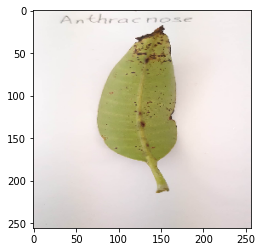

In [122]:
testing('/content/drive/MyDrive/Dataset/test/ANTH/ANTH011.png')




it is Anthracnose
 Confidence: 100.0%


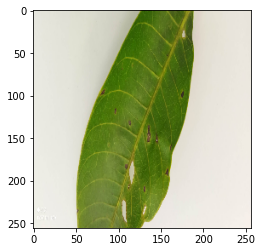

In [123]:
testing('/content/drive/MyDrive/Dataset/test/ANTH/ANTH180.png')




it is Anthracnose
 Confidence: 100.0%


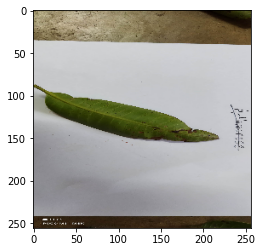

In [124]:
testing('/content/drive/MyDrive/Dataset/test/ANTH/ANTH403.png')




it is Black
 Confidence: 89.41%


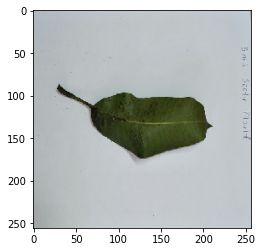

In [125]:
testing('/content/drive/MyDrive/Dataset/test/Black/BLAC0050.png')




it is Black
 Confidence: 100.0%


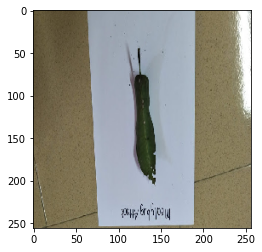

In [126]:
testing('/content/drive/MyDrive/Dataset/test/Black/BLAC0186.png')




it is healthy
 Confidence: 100.0%


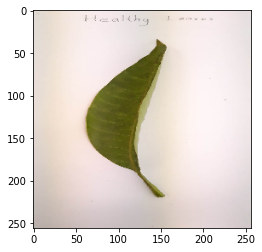

In [127]:
testing('/content/drive/MyDrive/Dataset/test/Healthy/HEAL0041.png')




it is healthy
 Confidence: 100.0%


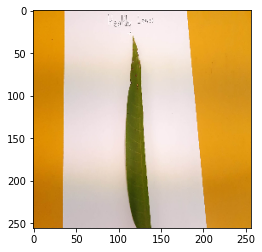

In [128]:
testing('/content/drive/MyDrive/Dataset/test/Healthy/HEAL0073.png')

# predict from custom test data




it is Anthracnose
 Confidence: 100.0%


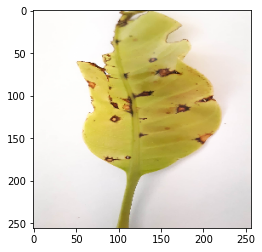

In [129]:
testing('/content/drive/MyDrive/test_all/test0000.png')




it is Anthracnose
 Confidence: 100.0%


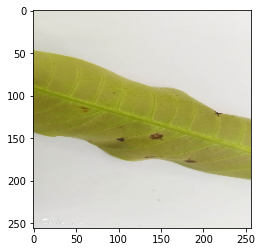

In [130]:
testing('/content/drive/MyDrive/test_all/test0051.png')




it is Black
 Confidence: 100.0%


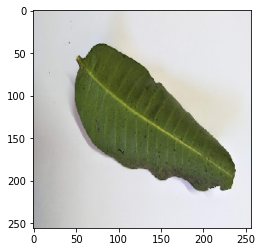

In [131]:
testing('/content/drive/MyDrive/test_all/test0109.png')




it is Black
 Confidence: 100.0%


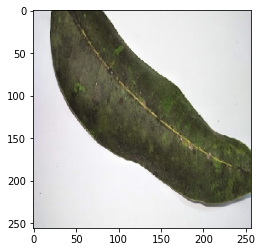

In [132]:
testing('/content/drive/MyDrive/test_all/test0133.png')




it is healthy
 Confidence: 76.08%


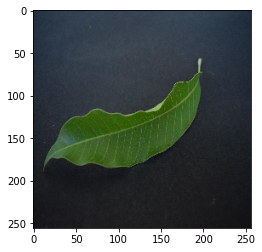

In [133]:
testing('/content/drive/MyDrive/test_all/test0217.png')




it is healthy
 Confidence: 100.0%


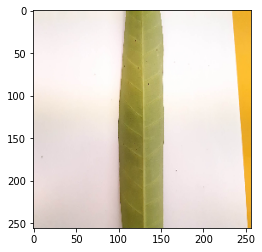

In [134]:
testing('/content/drive/MyDrive/test_all/test0239.png')




it is healthy
 Confidence: 100.0%


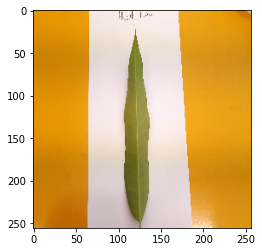

In [135]:
testing('/content/drive/MyDrive/test_all/test0273.png')




it is healthy
 Confidence: 100.0%


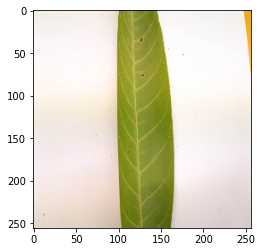

In [136]:
testing('/content/drive/MyDrive/test_all/test0229.png')

#Quantization

# Convert to tflite